# Set card game analysis
## Time of the game

In [1]:
%matplotlib inline
import xmltodict
import io
import json
import sys
import collections
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib
import seaborn as sns

In [2]:
W = pd.DataFrame(columns=('datetime', 'date', 'hour', 'weekday', 'registered',
                          'gametime', 'times'))
weekdays = ("monday tuedsay wednesday thursday friday "
            "saturday sunday").split(" ")

In [3]:
def handle_timetrial(_, timetrial):
    date = timetrial["started"]
    registered = False
    if timetrial["userid"] != "false":
        registered = True
    dt = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    # unfortunately, there are some games played in 1970-01-01,
    # which was of course bugged :(
    if dt.year == 1970:
        return True
    gametime = 0
    for event in timetrial["dealt"] + timetrial["taken"]:
        gametime = max(gametime, int(event["@abstime"]))
    W.loc[len(W)] = [dt, dt.date(), dt.hour, weekdays[dt.weekday()],
                     registered, gametime, 1]
    return True

In [4]:
filename = "big-data"
xmlfile = io.open(filename+".xml", 'r', encoding="ISO-8859-1")
buf = xmltodict.parse(xmlfile.read(), item_depth=2,
                      item_callback=handle_timetrial)


### How many games were played in particular days

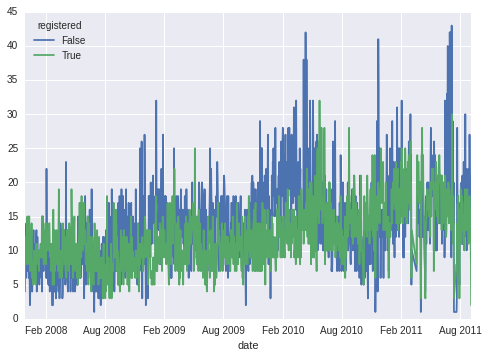

In [5]:
Wdate = W.pivot_table('times', ['date'], 'registered',  aggfunc=np.sum)
Wdate.plot()

### How many games were played in particular hours

registered  False  True 
hour                    
0             797   1301
1            1071   1708
2            1019   1210
3            1012   1126
4            1217   1056
5            1050    715
6             856    528
7             666    609
8             515    504
9             439    493
10            451    458
11            469    408
12            489    432
13            631    426
14            686    482
15            779    541
16            742    614
17            821    748
18            890    645
19            877    544
20            879    552
21            849    487
22            820    504
23            677    428


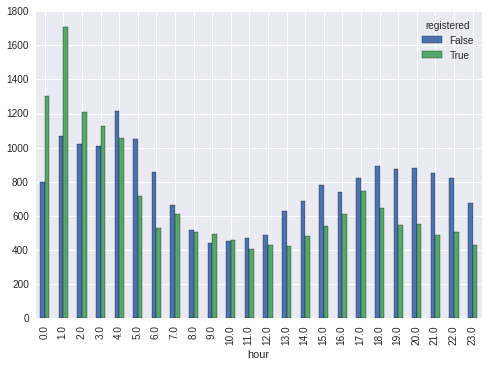

In [6]:
Whour = W.pivot_table('times', ['hour'], 'registered',  aggfunc=np.sum)
print(Whour)
Whour.plot(kind='bar')

### And in every weekday

registered  False  True 
weekday                 
monday       2826   2504
tuedsay      2849   2505
wednesday    2781   2514
thursday     2749   2426
friday       2638   2303
saturday     2335   2087
sunday       2524   2180


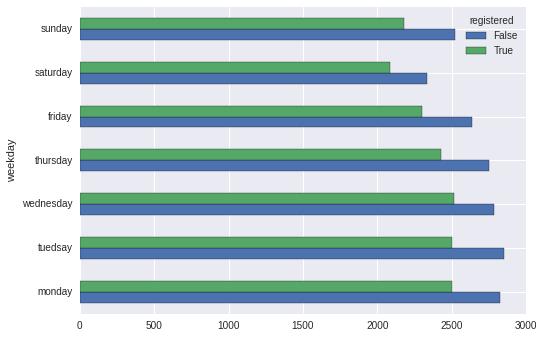

In [7]:
Wweek = W.pivot_table('times', ['weekday'], 'registered',  aggfunc=np.sum)
Wweek = Wweek.reindex_axis(weekdays, axis=0)
print(Wweek)
Wweek.plot(kind='barh')

### Length of game

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e2cf8c550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e2d2256a0>], dtype=object)

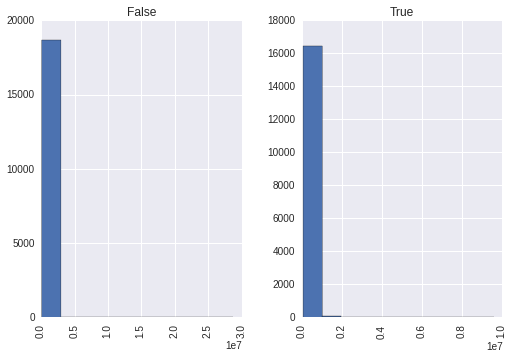

In [8]:
W["gametime"].hist(by=W["registered"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e26295da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e26046eb8>], dtype=object)

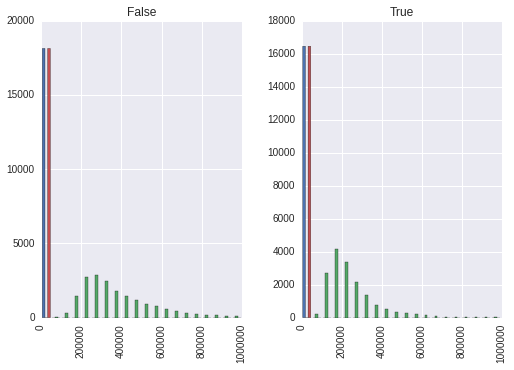

In [9]:
W[W["gametime"] <= 1*(10**6)].hist(by=W["registered"], bins=20)